# Hyperplanes

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.

Last Update 2/17/2022

**The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


The concept of a **linear classifier** is truly at the heart of machine learning, but to understand when an linear classifier is appropriate - and when it is not. And before this term can make sense one must first truly master the meaning of a **hyperplane**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
from sklearn.datasets import make_classification

## Lines in 2D - Hyperplanes in General

Hyperplanes are a key mathematical object that is at the heart of many machine learning classification methods.
The hyperplane is a generalization to higher dimensions
of a line (two dimensions) or of a plane (three dimensions).

A hyperplane is the set of vectors $\mathbf{x}$ is satisfy

$$
\mathbf{w}^\top \mathbf{x} + b = 0,
$$

where $\mathbf{w}$ is a fixed vector, called the *weight vector* and $b$ is a scalar value called the *bias*.

#### Example:  hyperplanes in two dimensions

In two dimensions a hyperplane has the form:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

This can be expressed as:

$$
x_2 = - \frac{w_1}{w_2} x_1 - \frac{b}{w_2},
$$

which is the familiar expression for a line.

### Hyperplanes with $b = 0$

To understand hyperplanes better, we'll start with the case $b=0$, i.e.

$$
\mathbf{w}^\top \mathbf{x} = 0.
$$

As we have seen previously, the dot product between two vectors is given by:

$$
\mathbf{w}^\top \mathbf{x} = ||\mathbf{w}|| \; ||\mathbf{x}|| \cos(\theta),
$$

where $\theta$ is the angle between the two vectors.
This implies that a hyperplane defined by the equation $\mathbf{w}^\top \mathbf{x}=0$ is *the set of all vectors* $\mathbf{x}$ *that are orthogonal to* $\mathbf{w}$.

We demonstrate this using the figure below emphasizing the line where the equation equals zero:


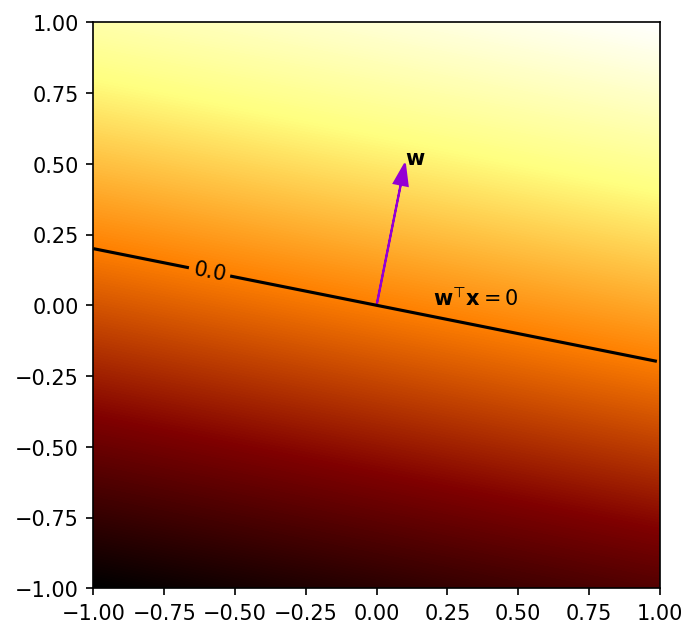

In [2]:
w = np.array([0.1,0.5])
#w = np.array([0.5,0.5])
# setting up the grid
delta = 0.01
xmin=-1; xmax=1; ymin=-1; ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

# the value produced by the hyperplane at each point of the grid
Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(5,5))

im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.afmhot, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 1, origin='lower',
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(0.2, 0, r"$\mathbf{w}^\top \mathbf{x} = 0$");


The line defined by the equation 

$$\mathbf{w}^\top \mathbf{x} = 0$$

divides the plane into two halves.

In the example above play different choices for the vector $\mathbf{w}$

## But There is More to $\mathbf{w}^\top \mathbf{x}$

As useful as the roots of the equation 

$$
\mathbf{w}^\top \mathbf{x} = 0.
$$

are, there is  more going on here.  Let us pay more attention to how the value of the function:

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}
$$

is changing for different locations $\mathbf{x}$ on the 2D plane. And, note that `Z` in our python code is samply the function $f(\mathbf{x})$ for regularly spaced grid samples.

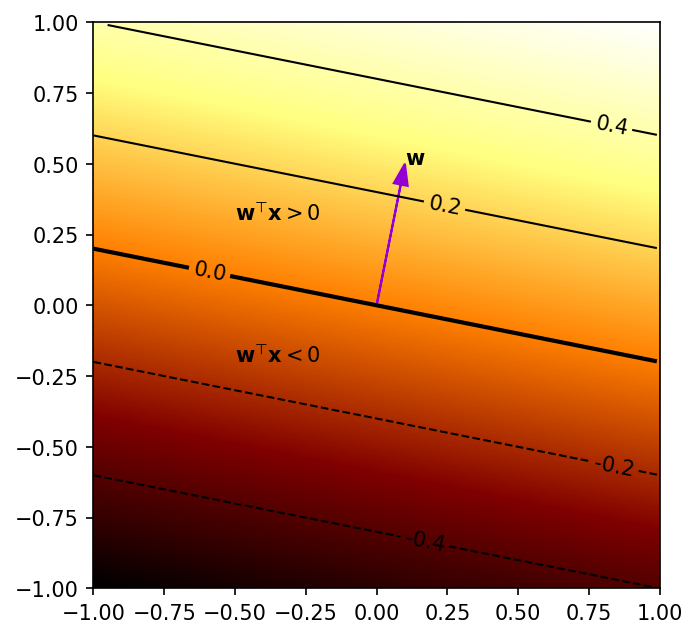

In [3]:
w = np.array([0.1, 0.5])

# setting up the grid
delta = 0.01
xmin=-1; xmax=1; ymin=-1; ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(5,5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.afmhot, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 5, 
                origin='lower',
                linewidths=(1,1,1,2,1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(-0.5, (0.1-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} > 0$");
plt.text(-0.5, (-0.15-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} < 0$");


## Measuring Distance from the Line

In the figure above you see the values of $\mathbf{w}^\top \mathbf{x}$ are growing as points move away from the line $\mathbf{w}^\top \mathbf{x} = 0$. To be more precise, they grow more positive going away in one direction and more negative moving away in the other. 

One way to play with this property is try, for example:

$$
\mathbf{w} = \begin{vmatrix} 0.5 \\ 0.0 \end{vmatrix}
$$

Pay close attention to the countour lines and you will notice they are appearing to measuring distance away from the origin going in the horizontal direction.  But, the actual values seem to half of what the actual units are along the horizontal direction. In other words, the function 

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}
$$

is equal to 0.5 when the horizontal coordinate of $\mathbf{x}$ reaches the limit of the plot at $1.0$.

Armed with this insight, we are ready to introduce the concept of projection onto a direction, a basis vector, $\mathbf{w}$. Consider how our figure changes if a unit length vector is chosen instead (try it).  

$$
\mathbf{w} = \begin{vmatrix} 1.0 \\ 0.0 \end{vmatrix}
$$

And if you work the algebra you will see the result is essentially a trivial consequence of our choice of $\mathbf{w}$.

But, and here is the big thing, for any choice of $\mathbf{w}$ such that

$$
\mathbf{w}^\top \mathbf{w} = 1
$$ 

The distance measured away for the line will be reported in the same units as the original space. Meaning, distance away from the line

$$
f(\mathbf{x}) = \mathbf{\hat{w}}^\top \mathbf{x}
$$

will be the true (signed) distance - think of Euclidian distance - from the point $\mathbf{x}$ and the line



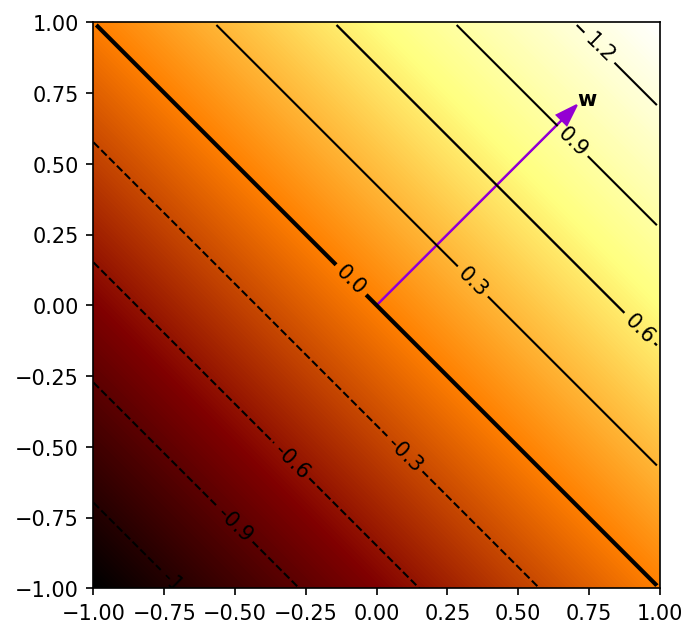

In [7]:
w = np.array([1.0,1.0])
# w = np.array([1.0, 0.0])
w = w / np.linalg.norm(w)

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

plt.figure(figsize=(5,5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.afmhot, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 9, 
                origin='lower',
                linewidths=(1,1,1,1,1,2,1,1.1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\mathbf{w}$");



### Demonstrating Projection onto Basis $\mathbf{\hat{w}}$

Using this figure play with different choice of unit length basis vectors and watch how signed distance from the line is revealed.

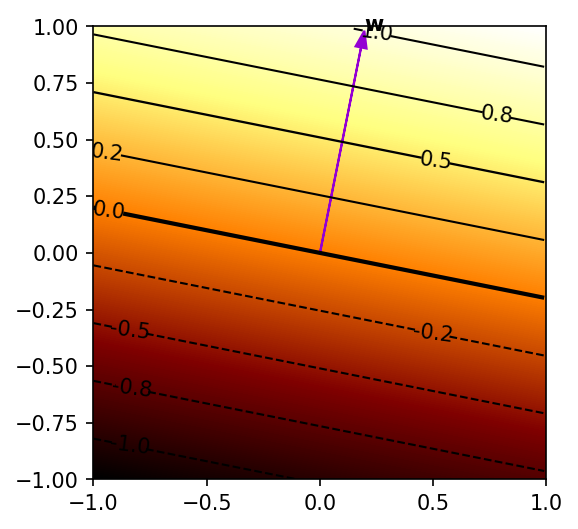

In [14]:
w = np.array([0.1,0.5])
w = w / np.linalg.norm(w)
# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

#plt.figure(figsize=(5,5))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.afmhot, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 9, 
                origin='lower',
                linewidths=(1,1,1,1,1,2,1,1.1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\mathbf{w}$");

### Hyperplane with a nonzero bias

The case $b\neq0$ is similar, except that the hyperplane no longer passes through the origin as demonstrated in the next figure:

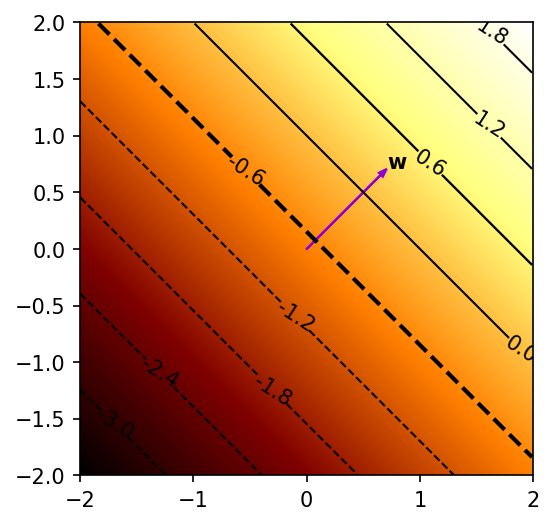

In [15]:
w = np.array([0.5,0.5])
w = w / np.linalg.norm(w)

# Introduce at bias
#b = 0.2
b = -1/np.sqrt(2)

delta = 0.01
xmin=-2;xmax=2;ymin=-2;ymax=2
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid + b

#plt.figure(figsize=(5,52))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.afmhot, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 9, 
                origin='lower',
                linewidths=(1,1,1,1,1,2,1,1.1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, 
          alpha=1,linestyle='-',color='darkviolet');
plt.text(w[0], w[1], r"$\mathbf{w}$");


The story in higher dimension is much the same.
In a $d$-dimensional vector space, a hyperplane has $d-1$ dimensions
and divides the space into two half-spaces - exactly what we need for a binary classifier!
In this context, hyperplanes create a linear *decision boundary*.

## Hyperplane for 2D Classification

Consider now a 2 class 2D problem.

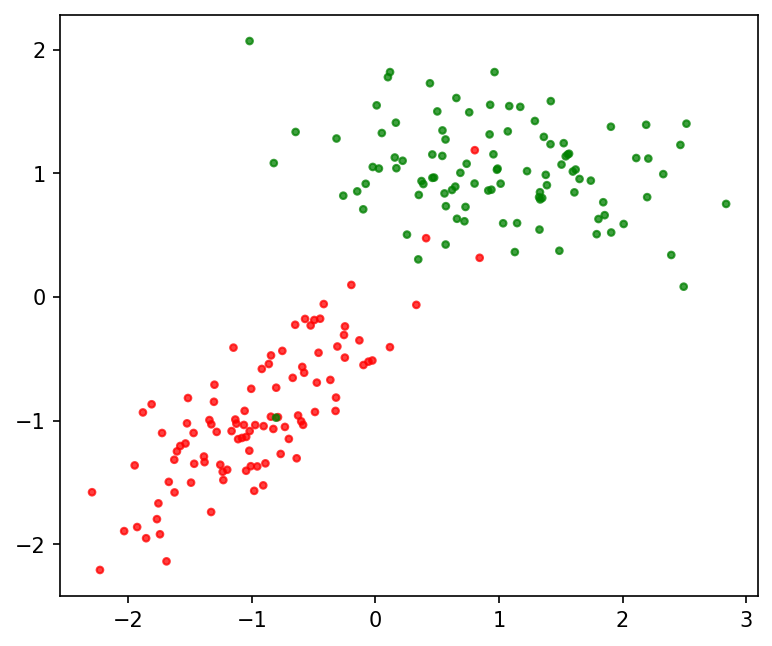

In [9]:
how_many_samples  = 200
how_many_features = 2
how_many_classes  = 2
how_many_clusters = 1
how_far_apart = 1.0
X,y = make_classification(n_samples=how_many_samples, 
                          n_features=how_many_features, 
                          n_classes=how_many_classes, 
                          n_clusters_per_class=how_many_clusters, 
                          class_sep=how_far_apart,
                          n_redundant=0, n_repeated=0, n_informative=2, 
                          random_state=16)

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, aspect='equal')
my_colors = ['red','green','blue']
color_lst = [my_colors[i] for i in y]
ax.scatter(X[:,0], X[:,1], c=color_lst, alpha=0.75, s=10);

### Picking a hyperplane direction

In Machine Learning there is a rich history regarding ways to pick the orientation of the most useful hyperplane and we are not ready to truely launch into that story. So, instead, let us work some arguably hacky first attempts. And, in defense of this approach, doing this may well help develop some geometric intuition key later as we present more standard approaches.  

As a starting point, let us conside the decebtively subtle question: What single point in space might be said to best represent a given class?

In [17]:
# Find an exemplar close to the center of each class

# For Class Zero
foo = X[y==0,:]
ptdsts = []
exemps = []
for i in range(len(foo)) :
    alldst = [np.sqrt(np.sum((foo[j]-foo[i])*(foo[j]-foo[i]))) for j in range(len(foo))]
    ptdsts.append(sum(alldst))
exemps.append(foo[np.argmin(ptdsts)])

# For Class One
foo = X[y==1,:]
ptdsts = []
for i in range(len(foo)) :
    alldst = [np.sqrt(np.sum((foo[j]-foo[i])*(foo[j]-foo[i]))) for j in range(len(foo))]
    ptdsts.append(sum(alldst))
exemps.append(foo[np.argmin(ptdsts)])
exemplar = np.array(exemps)

np.set_printoptions(precision=3)
print('Exemplar 0', exemplar[0])
print('Exemplar 1', exemplar[1])

Exemplar 0 [-0.972 -1.037]
Exemplar 1 [0.984 1.029]


### Vector From One Class to the Other

With a sample point found near the center of each class it is simple to add a drawing of the vector between two classes

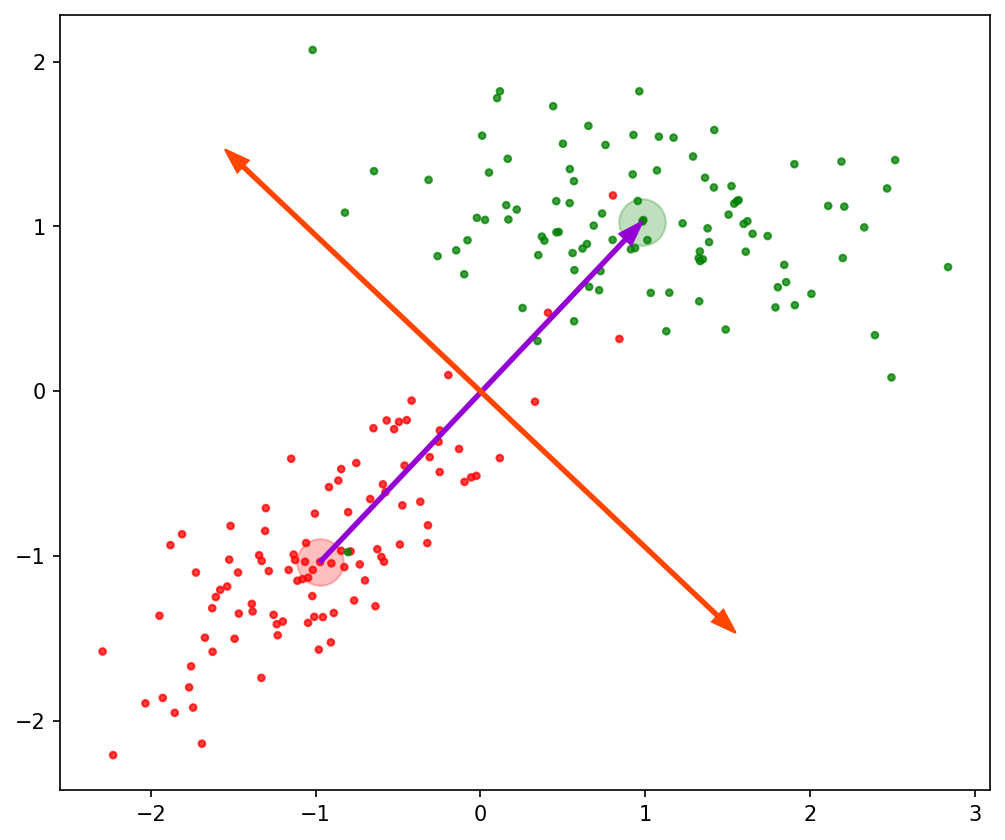

In [18]:
# The vector going from the exemplar from class 0 to the exemplar from class 1
# is here called between
between = exemplar[1] - exemplar[0]
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(111, aspect='equal')
my_colors = ['red','green','blue']
color_lst = [my_colors[i] for i in y]
ax.scatter(X[:,0], X[:,1], c=color_lst, alpha=0.75, s=10);
for i in range(2) :
    ax.scatter(exemplar[i,0], exemplar[i,1], alpha=0.25, s=500, color=my_colors[i])
ax.arrow(exemplar[0,0],exemplar[0,1],between[0],between[1], 
         width=0.02,head_width=0.1, length_includes_head=True, 
         alpha=1,linestyle='-',color='darkviolet');
ax.arrow(0,0,between[1]*0.75,-between[0]*0.75, 
         width=0.02,head_width=0.1, length_includes_head=True, 
         alpha=1,linestyle='-',color='orangered');
ax.arrow(0,0,-between[1]*0.75,between[0]*0.75, 
         width=0.02,head_width=0.1, length_includes_head=True, 
         alpha=1,linestyle='-',color='orangered');


### Project Onto Axis Perpendicular to the Hyperplane

The vector between above now will define for us a unit length vector $\mathbf{\hat{w}}$ onto which all sample will be projected.  The result is to take our 2D problem and turn it into a 1D problem.

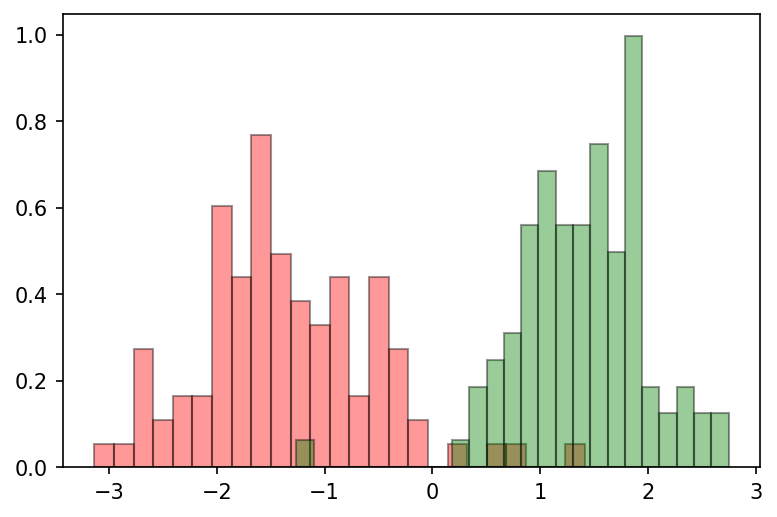

In [19]:
wn = between / np.linalg.norm(between)
#X0p = np.matmul(wn, np.transpose(X[y==0,:])) 
#X1p = np.matmul(wn, np.transpose(X[y==1,:])) 
X0p = X[y==0,:] @ wn
X1p = X[y==1,:] @ wn
num_bins = 25
plt.hist(X0p, num_bins, density=True, facecolor='red', alpha=0.4, 
         edgecolor = 'black', label='hist1');
plt.hist(X1p, num_bins, density=True, facecolor='green', alpha=0.4, 
         edgecolor = 'black', label='hist1');

## Now Repeat in Five Dimensions

With the caveat our nice 2D scatterplot of the data no longer applies, we can do exactly what we did before, but this time with 5D data.

In [11]:
how_many_samples  = 200
how_many_features = 5
how_many_classes  = 2
how_many_clusters = 1
how_far_apart = 1.0
X,y = make_classification(n_samples=how_many_samples, 
                          n_features=how_many_features, 
                          n_classes=how_many_classes, 
                          n_clusters_per_class=how_many_clusters, 
                          class_sep=how_far_apart,
                          n_redundant=0, n_repeated=0, n_informative=2, 
                          random_state=16)
X.shape

(200, 5)

In [12]:
# Find an exemplar close to the center of each class
foo = X[y==0,:]
ptdsts = []
for i in range(len(foo)) :
    alldst = [np.sqrt(np.sum((foo[j]-foo[i])*(foo[j]-foo[i]))) for j in range(len(foo))]
    ptdsts.append(sum(alldst))
exemplar_0 = foo[np.argmin(ptdsts)]
foo = X[y==1,:]
ptdsts = []
for i in range(len(foo)) :
    alldst = [np.sqrt(np.sum((foo[j]-foo[i])*(foo[j]-foo[i]))) for j in range(len(foo))]
    ptdsts.append(sum(alldst))
exemplar_1 = foo[np.argmin(ptdsts)]
(exemplar_0, exemplar_1)

(array([-1.24401437, -0.37085617, -0.06377229, -1.01948748,  0.50267878]),
 array([ 1.07762976, -0.58869879,  0.41086135,  0.73892971, -0.32591888]))

Project onto basis vector:  [ 0.756 -0.071  0.154  0.572 -0.27 ]


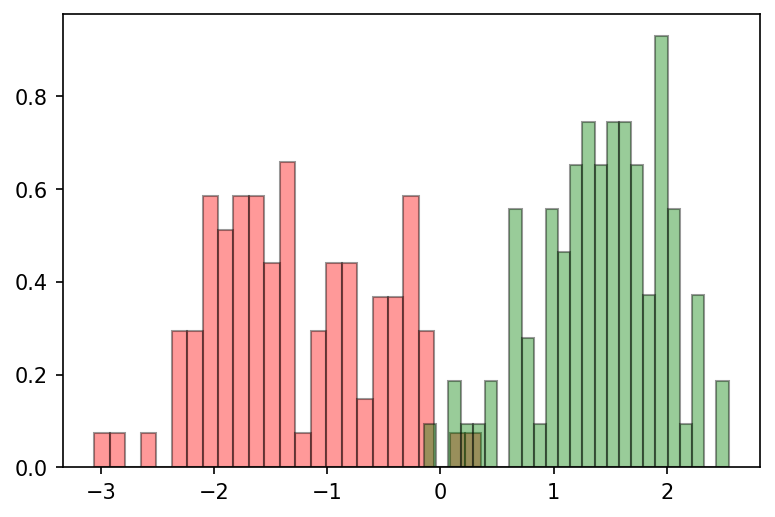

In [22]:
between = exemplar_1 - exemplar_0
wn = between / np.linalg.norm(between)
print('Project onto basis vector: ',wn)
#X0p = np.matmul(wn, np.transpose(X[y==0,:])) 
#X1p = np.matmul(wn, np.transpose(X[y==1,:])) 
X0p = X[y==0,:] @ wn
X1p = X[y==1,:] @ wn
num_bins = 25
plt.hist(X0p, num_bins, density=True, facecolor='red', alpha=0.4, 
         edgecolor = 'black', label='hist1');
plt.hist(X1p, num_bins, density=True, facecolor='green', alpha=0.4, 
         edgecolor = 'black', label='hist1');

### One More Thing - Glance at 5D Data

We of course can get a partial look into the structure of the 5D data using the tool we introduced earlier in the course.

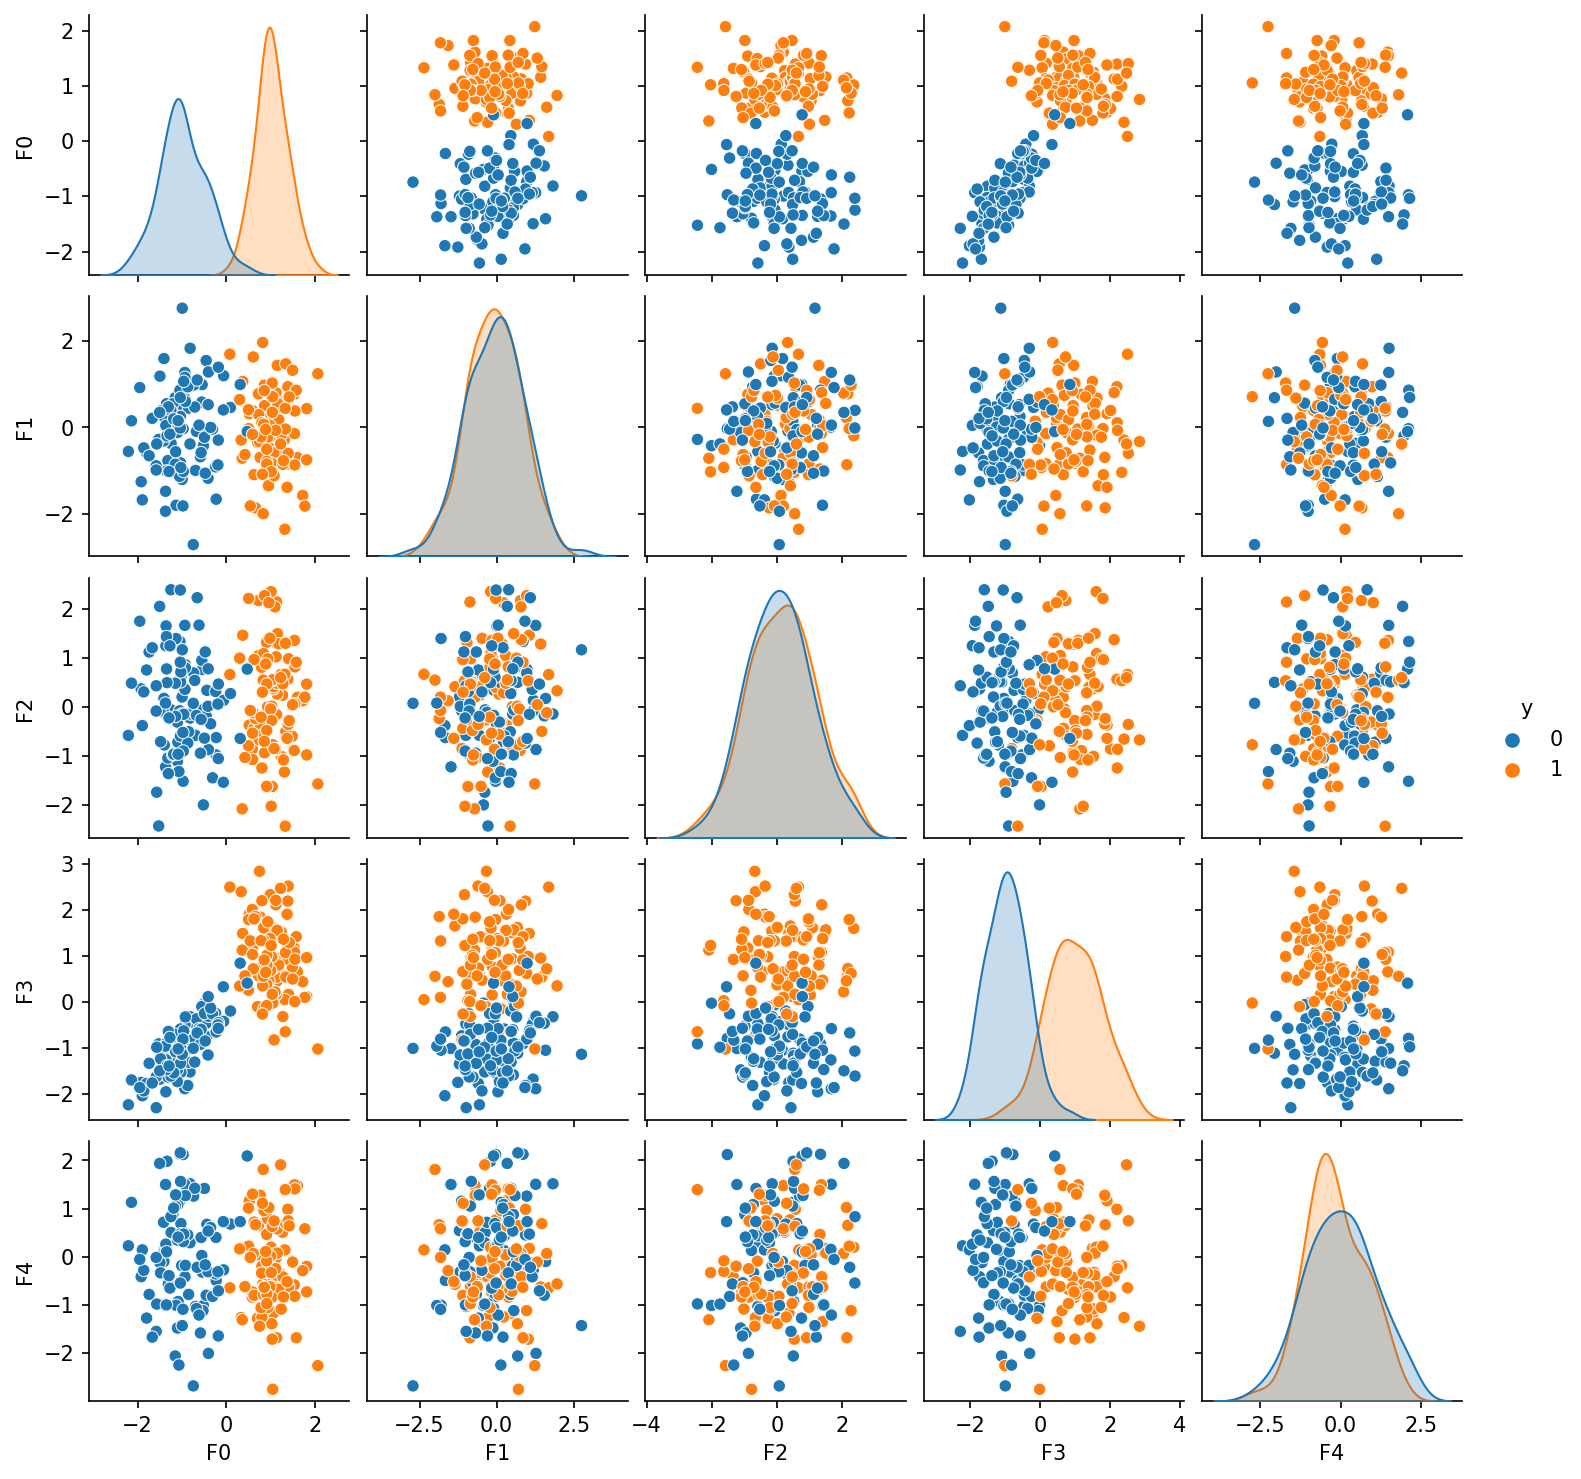

In [23]:
import seaborn as sns
import pandas as pd
test_df = pd.DataFrame(X, columns=["F0","F1","F2","F3","F4"])
test_df['y'] = y
sns.pairplot(test_df, hue='y', height=2.0);